# Metropolis Hastings

Taken from [CS228](https://cs.stanford.edu/~ermon/cs228/index.html)

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import gamma

In [17]:
def metropolis_hastings(p, q, q_draw, num_samples, x_init):
    samples = []
    x_prev = x_init
    
    for i in range(num_samples):
        # 1. pdf ratio
        # 2. proposal ratio
        # 3. 1 + 2 -> acceptabnce ratio
        x_star = q_draw(x_prev)
        pdf_ratio = p(x_star) / p(x_prev)
        proposal_ratio = q(x_prev, x_star) / q(x_star, x_prev)
        acceptance_prob = min(1, pdf_ratio * proposal_ratio)
        
        # draw
        u = np.random.uniform()
        
        # accept or reject
        if u < acceptance_prob:
            x_prev = x_star
            samples.append(x_star)
        else:
            samples.append(x_prev)
        
    return samples, x_prev

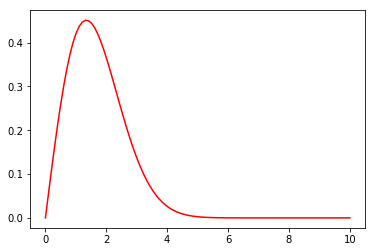

In [22]:
p = lambda x: 0.554 * x * np.exp(-(x / 1.9) ** 2)
x = np.linspace(0, 10, 100)
_ = plt.plot(x, p(x), 'r')

In [23]:
t = 10.0

def q(x_new, x_old):
    return gamma.pdf(x_new, x_old * t, scale=1 / t)

def q_draw(x_old):
    return gamma.rvs(x_old * t, scale=1 / t)

In [24]:
num_samples = 10000

x_init = np.random.uniform()
_, x_n = metropolis_hastings(p, q, q_draw, num_samples, x_init)

samples, _ = metropolis_hastings(p, q, q_draw, num_samples, x_n)

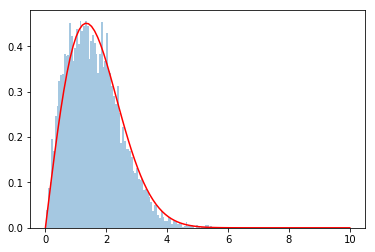

In [33]:
plt.hist(samples, bins=100, normed=True, alpha=0.4);
plt.plot(x, p(x), 'r')